In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [20]:
real_estate=pd.read_csv(r"C:\Users\student\Desktop\imarticus\ML\LR\Datasets\Real estate.csv",header=0,index_col=0)
real_estate.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8


# Exploratory data analysis


In [21]:
real_estate.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [22]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [23]:
real_estate.shape

(414, 7)

In [24]:
# Finding NULL values.
real_estate.isnull().sum()


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [25]:
# convert the "X1 transaction date" column to int for reducing the complexity of the model

real_estate['X1 transaction date']=real_estate['X1 transaction date'].astype(int)  


In [26]:
real_estate.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2012,34.5,623.47310,7,24.97933,121.53642,40.3
8,2013,20.3,287.60250,6,24.98042,121.54228,46.7
9,2013,31.7,5512.03800,1,24.95095,121.48458,18.8


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

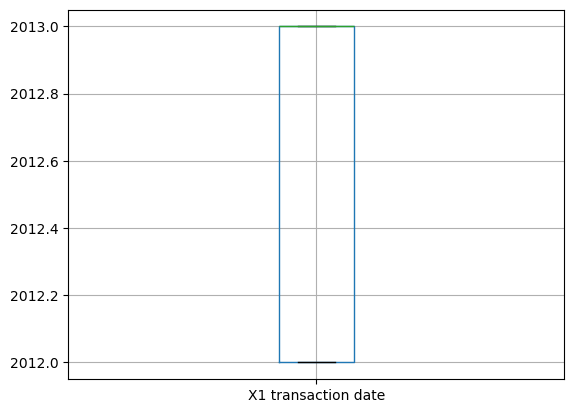

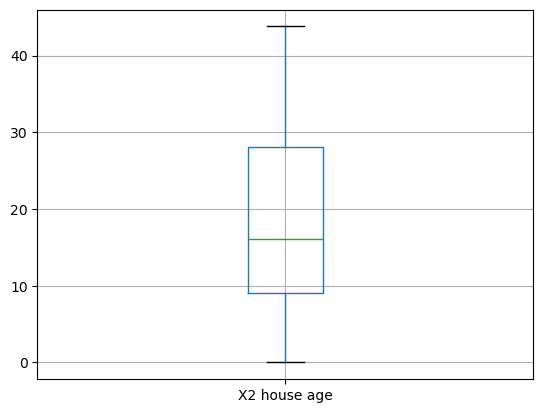

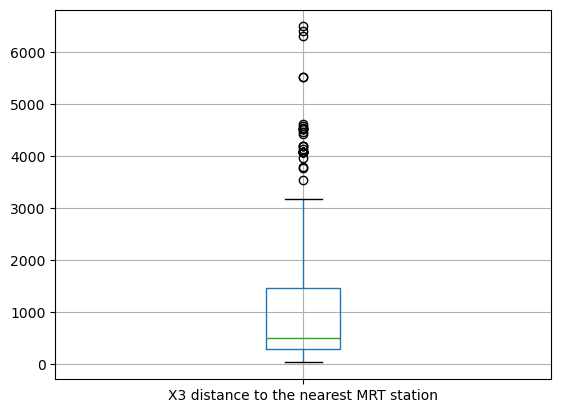

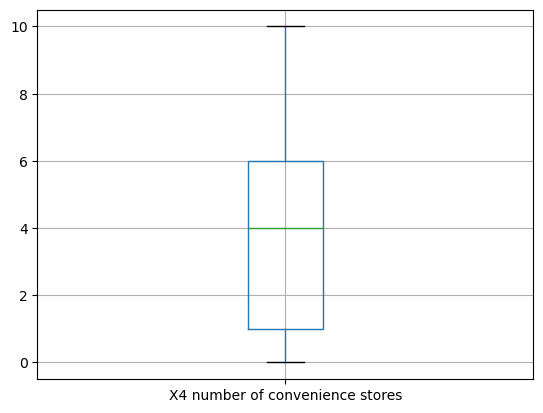

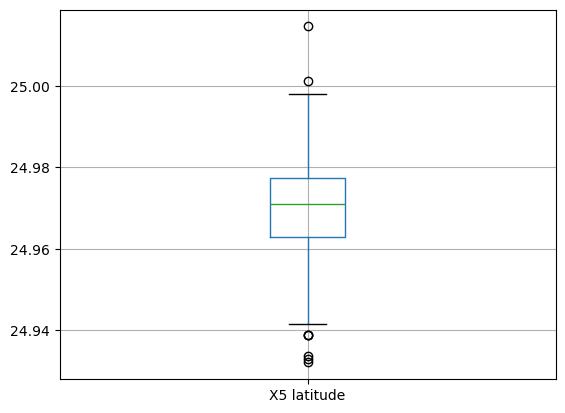

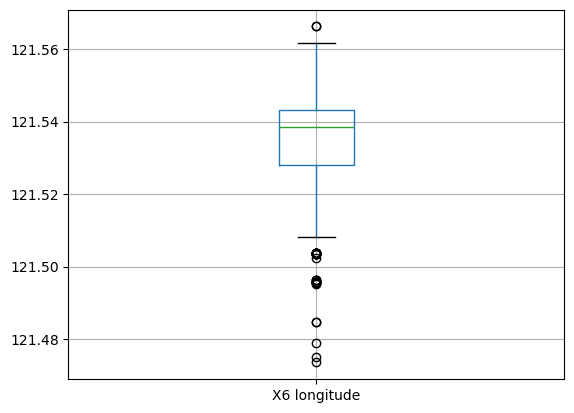

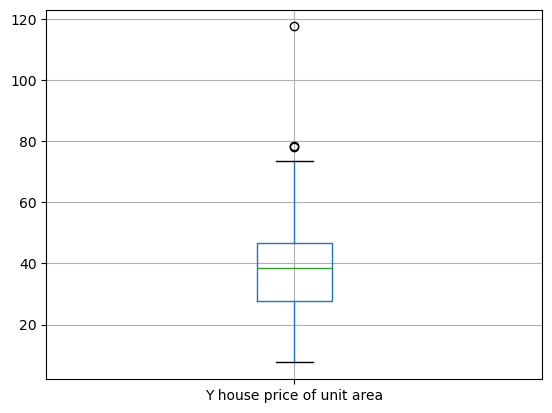

In [28]:
# looking for outliers
for i in real_estate.columns:
    real_estate.boxplot(column=i)
    plt.show()

In [29]:
# did not remove outlier because it may be a have significant effect on the model.
#real_estate.drop(real_estate[real_estate["Y house price of unit area"] >= 100].index,axis=0,inplace=True)


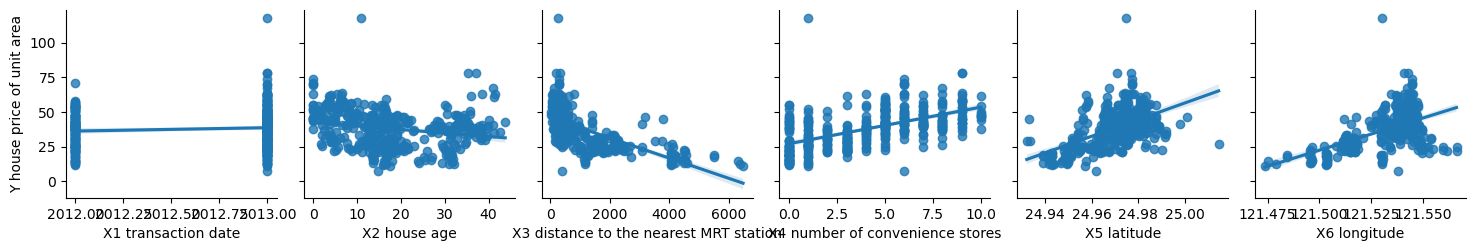

In [30]:
# looking for linearity in the X vars and y var
sns.pairplot(real_estate,x_vars=["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores",
                                 "X5 latitude","X6 longitude"],
             y_vars=["Y house price of unit area"],kind='reg')
plt.show()

In [31]:
real_estate.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [32]:
# Dividing the data in to X and Y variables
X= real_estate.loc[:,'X1 transaction date':'X6 longitude']
Y= real_estate.loc[:,'Y house price of unit area']


In [33]:
print(X.shape)
print(Y.shape)

(414, 6)
(414,)


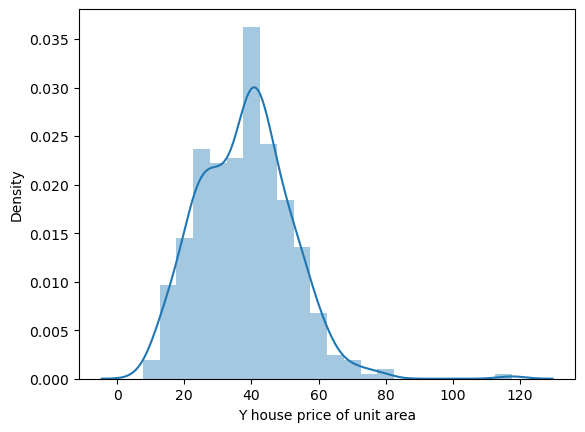

In [34]:
sns.distplot(Y)
plt.show()

In [35]:
# log transform to reduce skewness in Y
Y_log= np.log1p(Y)

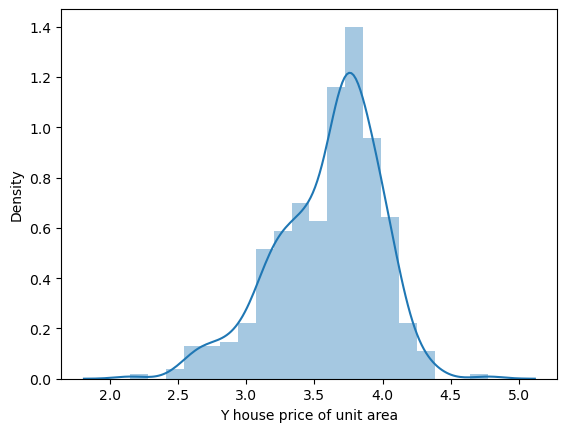

In [36]:
sns.distplot(Y_log)
plt.show()

In [37]:
Y=Y_log


In [38]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#X["newspaper"] = np.log1p(X["newspaper"])

X1 transaction date                      -0.850420
X2 house age                              0.381537
X3 distance to the nearest MRT station    1.881906
X4 number of convenience stores           0.154046
X5 latitude                              -0.437008
X6 longitude                             -1.215168
dtype: float64
X1 transaction date                      -0.850420
X3 distance to the nearest MRT station    1.881906
X6 longitude                             -1.215168
dtype: float64


                                        X1 transaction date  X2 house age  \
X1 transaction date                                1.000000      0.049171   
X2 house age                                       0.049171      1.000000   
X3 distance to the nearest MRT station             0.061721      0.066946   
X4 number of convenience stores                   -0.005586      0.049593   
X5 latitude                                        0.008118      0.054420   
X6 longitude                                       0.013176     -0.048519   

                                        X3 distance to the nearest MRT station  \
X1 transaction date                                                   0.061721   
X2 house age                                                          0.066946   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.685707   
X5 latitude                                       

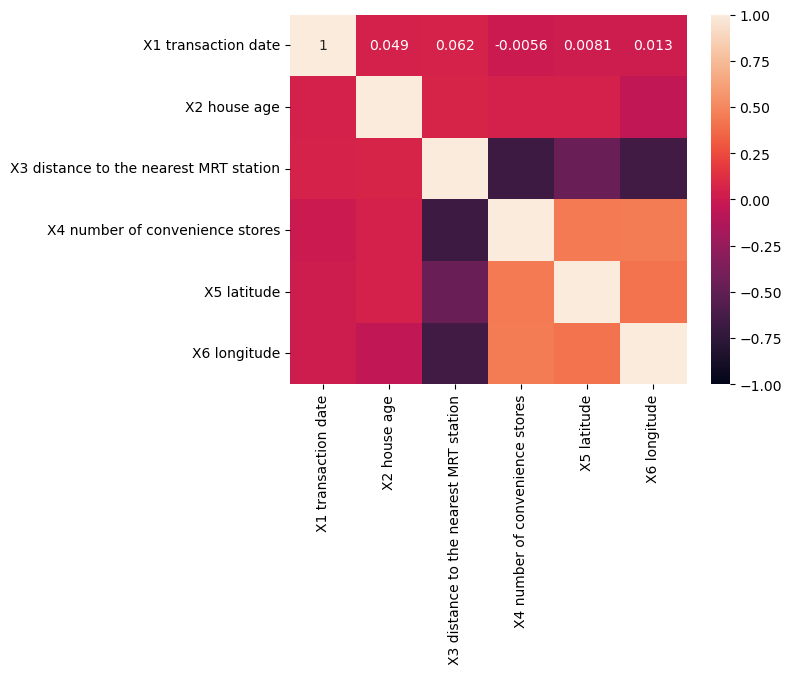

In [39]:
# studying the multicollinearity of the IVs
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [40]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)
 


,features,VIF Factor
0,X1 transaction date,8.338446e+08
1,X2 house age,3.520000e+00
2,X3 distance to the nearest MRT station,7.894000e+01
3,X4 number of convenience stores,5.870000e+00
4,X5 latitude,5.466679e+06
5,X6 longitude,8.460831e+08


In [41]:
# drop the variable with highest VIF to reduce multi-collinearity in data.
#X.drop("X6 longitude",axis=1,inplace=True)



In [42]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)
 

,features,VIF Factor
0,X1 transaction date,8.338446e+08
1,X2 house age,3.520000e+00
2,X3 distance to the nearest MRT station,7.894000e+01
3,X4 number of convenience stores,5.870000e+00
4,X5 latitude,5.466679e+06
5,X6 longitude,8.460831e+08


# Data Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)


# Training

In [44]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


In [46]:
from sklearn.linear_model import LinearRegression
#create a model object
lm= LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.588031078179423
[ 0.04342297 -0.06721156 -0.18697694  0.02902527  0.12187922  0.03615749]


In [47]:
Y_pred=lm.predict(X_test)

# MODEL EVALUATION

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7411064152970196
RMSE: 0.17878899346565114
Adj R-square: 0.7372898022547152


# MODEL TUNING:
### RIDGE

In [49]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,Y_train)

print(rid.intercept_)
print(rid.coef_)



3.588013960272234
[ 0.04323484 -0.06705659 -0.18577646  0.02964755  0.12157372  0.03667379]


In [50]:
Y_pred=rid.predict(X_test)
Y_pred.shape

(83,)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7411334413763082
RMSE: 0.1787796612691262
Adj R-square: 0.7373172267528632


In [64]:
#Using cross validation
 
lm=LinearRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=lm,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.68416894 0.73434546 0.84332689 0.54965092 0.72260227 0.8218245
 0.58893723 0.70275815 0.65938309 0.80289334]
0.710989078676606
